In [ ]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function

# Matplotlib
## Introduction

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes: 

 1. Allow for interactive, cross-platform control of figures and plots
 2. Make it easy to produce static raster or vector graphics files without the need for any GUIs. 
 
Matplotlib gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains the [example galleries](https://matplotlib.org/gallery/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and [tutorials](https://matplotlib.org/tutorials/index.html).

## Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](https://matplotlib.org/gallery/index.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. 

## StackOverflow, and AI
When you are just simply stuck, and cannot figure out how to get something to work, or just need some hints on how to get started, you will find much of the community at  [StackOverflow](http://stackoverflow.com/questions/tagged/matplotlib), so if you need to build up karma points, submit your questions here, and help others out too! 

In the age of AI, many times (including in the VSCode chatbot), typing your plotting question in will yeild code that is very close to what you will need. 
Most of the time, there will be a few minor modifications to align with the appropriate software versions.


# Quick note on "backends" and Jupyter notebooks

Matplotlib has multiple "backends" that handle converting Matplotlib's in-memory representation of your plot into the colorful output you can look at.  This is done either by writing files (e.g., png, svg, pdf) that you can use an external tool to look at or by embedding into your GUI toolkit of choice (Qt, Tk, Wx, etc).

To check what backend Matplotlib is currently using:

In [1]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.10.7
module://matplotlib_inline.backend_inline


If you are working interactively at an (I)python prompt, the GUI framework is not critical (mostly aesthetic) however we are working in Jupyter and need to pick a backend that integrates with Jupyter (javascript) framework.

To select the backend use ``matplotlib.use("backend_name")``, in this case we want ``'inline'``


In [2]:
matplotlib.use('inline')
print(matplotlib.get_backend())

inline


which must be done *before* you `import matplotlib.pyplot as plt`.
If you already `import matplotlib.pyplot as plt`, you can simply restart your interactive session.

You can also set the backend via an 'ipython magic' ``%matplotlib backend_name``.  
In interactive Python environments like Jupyter notebooks, "magic commands" are special commands that enhance the environment's functionality and simplify common data analysis tasks. 
They are specific to IPython and are not part of the standard Python language itself

In addition to setting the backend, the magic also calls `plt.ion()`, which puts Matplotlib in 'interacitve mode' (the inverse is `plt.ioff()`).  In 'interactive mode' figures are shown (injected into the web page in the notebook) as soon as they are created.  Otherwise, figures are not shown until you explicitly call `plt.show()`.


In [3]:
%matplotlib inline

## Anatomy of a "Plot"

<img src="images/figure_axes_axis_labeled.png" width= "400">

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  It is methodologically correct to set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  


In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Figures

Now let's create a figure...

In [ ]:
fig = plt.figure() # Create a new figure

<Figure size 640x480 with 0 Axes>

No figure appeared, only an object describing its size and axes,0! This is because by default mpl will not show anything until told to do so, as we mentioned earlier in the "backend" discussion.

Instead, we'll need to call ``plt.show()``

In [ ]:
plt.show() # Display the figure

We get a blank figure! Not terribly useful yet.


However, while we're on the topic, you can control the size of the figure through the ``figsize`` argument, which expects a tuple of ``(width, height)`` in inches. 

A useful utility function is [`figaspect`](https://matplotlib.org/api/_as_gen/matplotlib.figure.figaspect.html?highlight=figaspect#matplotlib.figure.figaspect)

In [11]:
# Twice as tall as it is wide using the figaspect function. Notice we call the function from the plt module
fig = plt.figure(figsize=plt.figaspect(2.0)) #notice how the printout changes to 400x800
plt.show()

<Figure size 400x800 with 0 Axes>

# Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. A "subplot" is just an axes on a grid system.

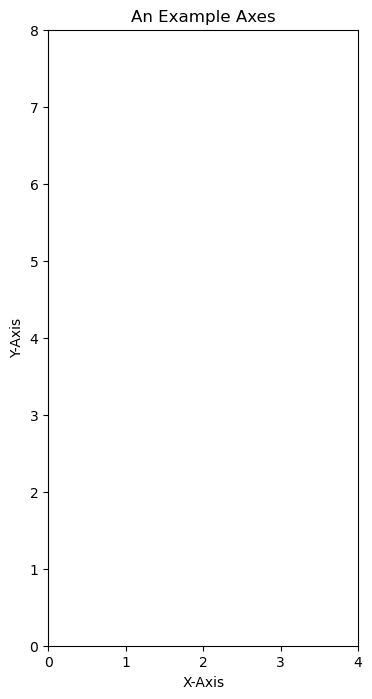

In [17]:
fig = plt.figure(figsize=plt.figaspect(2.0)) # Create a new figure with specified aspect ratio
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0, 4],# Set x-axis limits
       ylim=[0, 8], # Set y-axis limits
       title='An Example Axes', # Set the title
       ylabel='Y-Axis', # Set the y-axis label
       xlabel='X-Axis') # Set the x-axis label
plt.show() # Display the figure with axes, now that we set up the ax, we now get a plot with axes


Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

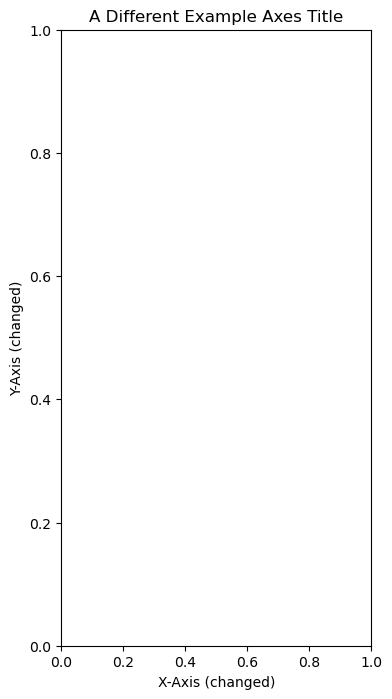

In [ ]:
fig = plt.figure(figsize=plt.figaspect(2.0)) # Create a new figure with specified aspect ratio
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
# Now modify the axes after creation
ax.set_title('A Different Example Axes Title') # Change the title
ax.set_ylabel('Y-Axis (changed)') # Change the y-axis label
ax.set_xlabel('X-Axis (changed)') # Change the x-axis label
plt.show()

This can get repitive quickly. 
Matplotlib's `set` method can be very handy. 
It takes each kwarg (keyword arguement) you pass it and calls the corresponding "setter".  
For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, in most cases when you are making figures requiring more control, you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

## Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  
We will begin two methods: `plot` and `scatter`, two methods we reviewed during the Pandas plotting tutorial.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

Lets put some data into our plots!

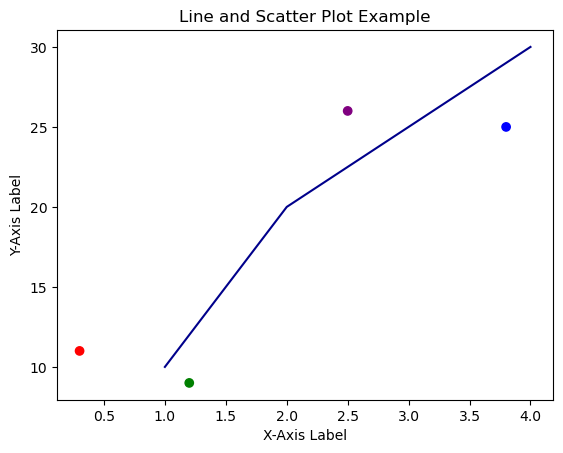

In [ ]:
fig = plt.figure() # Create a new figure
ax = fig.add_subplot(111) # Create an axes in the figure
# Now we can plot on the axes
ax.plot([1, 2, 3, 4], # x values
        [10, 20, 25, 30], # y values
        #color='darkblue', # line color, get more colors here: https://matplotlib.org/stable/tutorials/colors/colors.html
        #linewidth=3,# line width
        #linestyle='-' # line type (other includes '--', ':', '-.')
) #closes the plot function

# Now add a scatter plot on top of the line plot
ax.scatter([0.3, 3.8, 1.2, 2.5], # x values
           [11, 25, 9, 26], # y values
           #c=['red', 'blue', 'green', 'purple'], # colors, get more colors here: https://matplotlib.org/stable/tutorials/colors/colors.html
          # s=[50, 100, 200, 500], # marker size
           #marker='^' # marker style, other styles include 'o', 's', 'x', 'D'
) # Close the scatter function

# Now set the axes labels and title
ax.set_title('Line and Scatter Plot Example') # Set the title
ax.set_ylabel('Y-Axis Label') # Set the y-axis label
ax.set_xlabel('X-Axis Label') # Set the x-axis label
#ax.set_xlim(0.5, 4.5) # Set the x-axis limits, notice this removes points outside this range
#ax.set_ylim(0, 35) # Set the y-axis limits
plt.show()

## Axes methods vs. pyplot

MPL offers multiple approaches to accomplish the same tasks as just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). 
For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". 
Below is an equivalent version of the above example using just pyplot.

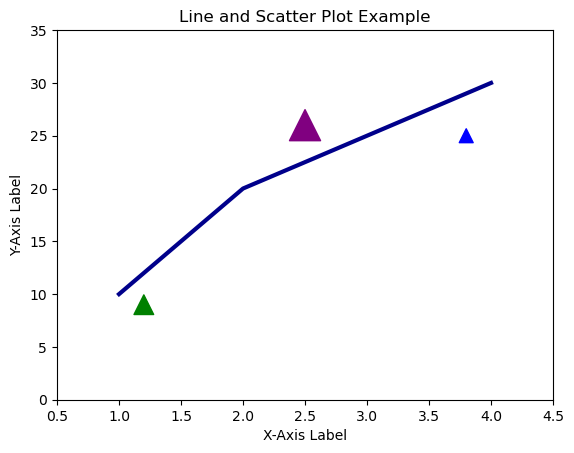

In [30]:
# Same plot as above but using the pyplot interface instead of the object-oriented interface
plt.plot([1, 2, 3, 4], # x values
         [10, 20, 25, 30], # y values
         color='darkblue',# line color
         linewidth=3, # line width
         linestyle='-' # line type (other includes '--', ':', '-.'
         ) # closes the plot function

# Now add a scatter plot on top of the line plot
plt.scatter([0.3, 3.8, 1.2, 2.5], # x values
            [11, 25, 9, 26], # y values
            c=['red', 'blue', 'green', 'purple'], # colors
            marker='^', # marker style
            s=[50, 100, 200, 500] # marker size
            ) # Close the scatter function

# Now set the axes labels and title
plt.title('Line and Scatter Plot Example') # Set the title
plt.ylabel('Y-Axis Label') # Set the y-axis label
plt.xlabel('X-Axis Label') # Set the x-axis label
plt.xlim(0.5, 4.5) # Set the x-axis limits, notice, this removes one of the data points on the left
plt.ylim(0, 35) # Set the y-axis limits
plt.show()

That is a bit terser and has fewer local varialbes, so, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"Explicit is better than implicit"

<img src="images/zenPython.png" width= "800">

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

### Multiple Axes

A figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

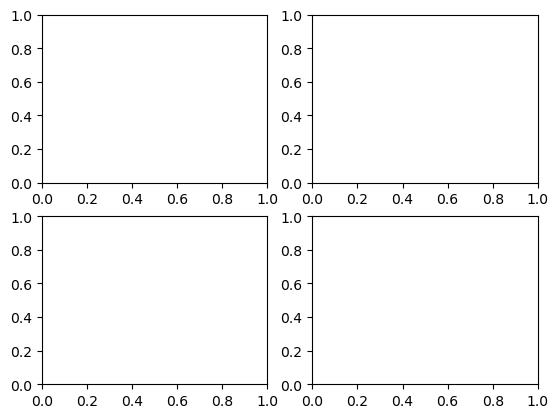

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2) # Create a figure and a 2x2 grid of subplots, attached to fig, axes variables
plt.show()

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

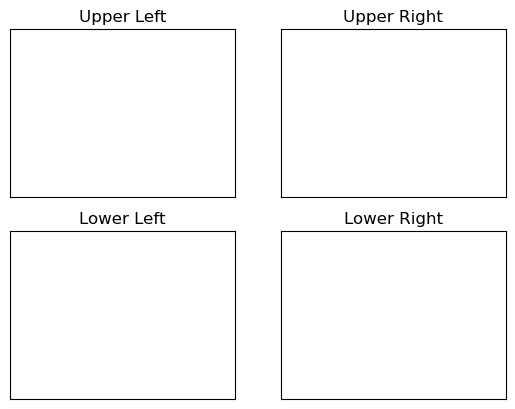

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2) # Create a figure and a 2x2 grid of subplots, attached to fig, axes variables
axes[0,0].set(title='Upper Left') # Set title for upper left subplot
axes[0,1].set(title='Upper Right') # Set title for upper right subplot
axes[1,0].set(title='Lower Left') # Set title for lower left subplot
axes[1,1].set(title='Lower Right') # Set title for lower right subplot

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute. 
# Iterating is a key method to expedite and automate figure development
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

Different than using plt.figure, when `plt.subplots()` is called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

Quick Exercise: Exercise 1.1
--------------

Let's use some of what we've been talking about.  lets reproduce this figure?

<img src="images/exercise_1-1.png">

Here's the data and some code to get you started.

In [34]:
# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?


Next lesson [Part2 Plotting Methods Overview](Part2-Plotting_Methods_Overview.ipynb)